

*   Felix Dornier

*   Soufiane Sebbata
*   Assia Bourai



#Import des librairies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import average_precision_score
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
import time
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics import f1_score as f1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import math
from sklearn.metrics import explained_variance_score
import plotly.express as px
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

#Données Crédits bancaires

## Extraction des données

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv', sep=',', header=None)

L'ensemble de données de crédits décrit les détails financiers et bancaires des
clients.


Noms des variables :
(Statut du compte courant existant, Durée en mois, Historique de crédit, Objectif,
Montant du crédit, Compte d'épargne, Emploi actuel depuis, Taux de versement en,
pourcentage du revenu disponible, Statut personnel et sexe, Autres
débiteurs,Résidence actuelle depuis, Propriété, Age en années, Autres plans de
versement, Logement, Nombre de crédits existants dans cette banque, Travail,
Nombre de personnes à charge, Téléphone, Travailleur étranger).

##Description des données

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


##Analyse exploratoire

In [ ]:
SA = data.loc[:,[8,12]]
fig = px.box(SA, x=8, y=12, points="all",color=8)
fig.update_layout(
    title={
          'text':"Sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Sex",
    yaxis_title="Age",
   
)
fig.show()

Il y a trois variables distinctes qui décrivent les males(célibataire, divorcé et marrié) contre une seule pour les femmes(A92: célibataires). Ces dernières ont en moyenne 28 ans et 75% d'entre elles ont moins de 37ans. Les hommes ont une moyenne beaucoup plus elevée (35ans) et 75% de l'effectif dépasse les 30ans, sauf pour les hommes mariés A94 qui ont une distribution proche de celles des femmes. On remarque aussi beaucoup d'outliers chez les hommes et femmes célibataires (A92-93) qui atteignent 75ans.

In [ ]:
Purpose = data[3]
fig = px.histogram(data, x=3, color=3)
fig.update_layout(
    title={
          'text':"Purpose breakdown",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

Le graphique de l'histogramme montre que la plupart des crédits sont destinés à l'achat d'une  radio/télévision (A43), suivi de la voiture neuve (A40) puis les meubles/équipement (A42).

In [ ]:
SC =data.loc[:,[3,4]]
fig = px.box(SC, x=3, y=4, color=3)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

On cherche à comparer sur ce graphique les objectifs du crédit et sa valeur. Pour les trois éléments principaux, on remarque que la majorité des crédits pour l'achat d'une télé/radio ne dépassent pas 3.5K, ce qui n'est pas une très grande somme. Par contre, il existe plusieurs outliers dont la plupart sont centrés entre 5k et 7k et certains qui dépassent les 10k. De même pour la voiture, bien que la plupart des valeurs sont inférieurs à 4k, les outliers  sont nombreux et atteignent les 15k. Pour conclure, quelle que soit l'objectif du crédit, son montant varie beaucoup selon l'individu, mais la plupart des valeurs restent dans l'ordre des 5k. 

In [ ]:
SC =data.loc[:,[16,4]]
fig = px.box(SC, x=16, y=4, color=16)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Job Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Job",
    yaxis_title="Credit amount",
   
)
fig.show()

On remarque que les montants de crédits varient en fonction du type de job. Les sans emplois (A171) ont la moyenne la plus faible, suivis de A172(unskilled) qui ne dépassent pas les 5k mais ou on trouve des outliers à montant élevé, ensuite les skilled/oficial et enfin les self employed/managenment/.. dont une grande partie ont des crédits à montant élevé.

In [ ]:
SC =data.loc[:,[12,4]]
fig = px.box(SC, x=4, y=12, color=4)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Age Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Credit amount",
    yaxis_title="Age",
   
)
fig.show()

On conclut de ce graphique que l'age n'a pas un effet important sur le montant du crédit, sauf pour les crédits qui dépassent les 6k où l'age minimum devient 39ans.

In [ ]:
SC =data.loc[:,[12,2]]
fig = px.box(SC, x=2, y=12, color=2)
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Age Vs Credit history",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Credit history",
    yaxis_title="Age",
   
)
fig.show()

On cherche à déteminer ici les catégories d'age qui ont eu des difficultés à payer leur crédit. Le graphique nous montre que l'age n'influence pas sur l'historique des crédits.

In [ ]:
correlation_matrix = data.corr()
correlation_matrix[20]

1     0.214927
4     0.154739
7     0.072404
10    0.002967
12   -0.091127
15   -0.045732
17   -0.003015
20    1.000000
Name: 20, dtype: float64

On remarque que les variables les plus corrélées avec la variable y sont la durée du crédit et le montant du crédit, mais même ceux ci n'ont pas une forte corrélation (0.21 et 0.15). Les autres variables sont quasiment nulles.

# Modèles de scoring

In [ ]:
data.groupby(20).size()

20
1    700
2    300
dtype: int64

**On constate que la variable de sortie n'est pas correctement balancée avec 700 valeurs pour la classe 1 et 300 pour l'autre, soit plus que le double. Nous allons d'abord procéder à la création des modèles de scoring sur les données telles qu'elles sont avant de tester sur des données équilibrées dans la deuxième partie.**

In [ ]:
X=data.iloc[:,:20]
y=data.iloc[:,20]
X.columns.values.astype(str)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'], dtype='<U21')

In [ ]:
#One Hot enconding, les catégories d'une variable deviennent une nouvelle variable binaire
X= pd.get_dummies(X, columns=[0,2,3,5,6,8,9,11,13,14,16,18,19], prefix = [0,2,3,5,6,8,9,11,13,14,16,18,19])


In [ ]:
X.columns=X.columns.values.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,random_state=42)

##Random Forest

In [ ]:
random_forest = RandomForestClassifier( random_state = 100)
rf=random_forest.fit(X_train, Y_train)

In [ ]:
Y_test_pred=rf.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
confusion_matrix

array([[162,  16],
       [ 41,  31]])

In [ ]:
total=sum(sum(confusion_matrix))
sensitivity_recall = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity_recall : ',sensitivity_recall )
Specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity: ', Specificity)
precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Precision: ', precision)
accuracy =(confusion_matrix[0,0]+confusion_matrix[1,1])/(confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
print('Accuracy: ', accuracy)

Sensitivity_recall :  0.7980295566502463
Specificity:  0.6595744680851063
Precision:  0.9101123595505618
Accuracy:  0.772


In [ ]:
print('NMI: ',nmi(Y_test,Y_test_pred))
print("Recall:",recall_score(Y_test,Y_test_pred))
print("F-score: ", f1(Y_test,Y_test_pred))

NMI:  0.13149594337714884
Recall: 0.9101123595505618
F-score:  0.8503937007874016


##KNN

In [ ]:
# test for k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_kn = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_kn))

0.596


In [ ]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 33))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred_k))

Text(0, 0.5, 'Testing Accuracy')

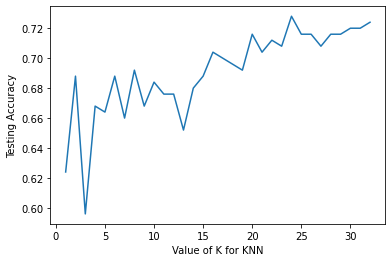

In [ ]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#Select the model with best result
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, Y_train)
y_pred_kn = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_kn))

0.724


In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_kn))
print("Precision:",precision_score(Y_test, y_pred_kn))
print("Recall:",recall_score(Y_test, y_pred_kn))
print('NMI: ',nmi(Y_test,y_pred_kn))
print("F-score: ", f1(Y_test,y_pred_kn))

Accuracy: 0.724
Precision: 0.7224489795918367
Recall: 0.9943820224719101
NMI:  0.0330193573014295
F-score:  0.8368794326241134


##xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 12345)

xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X, y)   

xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


0.759

##Naive Bayes

In [ ]:
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, Y_train)

print("Primitive error evaluation accuracy score: ", model.score(X_train, Y_train))

y_pred_nb = model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(Y_test,y_pred_nb),"\n")

print("Confusion Matrix: \n", confusion_matrix(Y_test, y_pred_nb),"\n")

print("Classification report according to Test prediction: \n", classification_report(Y_test, y_pred_nb))

Primitive error evaluation accuracy score:  0.736
Test predict accuracy score:  0.732 

Confusion Matrix: 
 [[131  47]
 [ 20  52]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           1       0.87      0.74      0.80       178
           2       0.53      0.72      0.61        72

    accuracy                           0.73       250
   macro avg       0.70      0.73      0.70       250
weighted avg       0.77      0.73      0.74       250



In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_nb))
print("Precision:",precision_score(Y_test, y_pred_nb))
print("Recall:",recall_score(Y_test, y_pred_nb))
print('NMI: ',nmi(Y_test,y_pred_nb))
print("F-score: ", f1(Y_test,y_pred_nb))

Accuracy: 0.732
Precision: 0.8675496688741722
Recall: 0.7359550561797753
NMI:  0.14184884299818223
F-score:  0.7963525835866261


##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

y_pred_log=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cnf_matrix =confusion_matrix(Y_test, y_pred_log)
cnf_matrix

Text(0.5, 257.44, 'Predicted label')

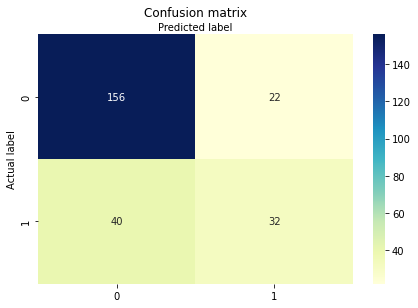

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_log))
print("Precision:",precision_score(Y_test, y_pred_log))
print("Recall:",recall_score(Y_test, y_pred_log))

Accuracy: 0.752
Precision: 0.7959183673469388
Recall: 0.8764044943820225


In [ ]:
print('NMI: ',nmi(Y_test,y_pred_log))
print("F-score: ", f1(Y_test,y_pred_log))

NMI:  0.10274125749562035
F-score:  0.8342245989304812


##Decision tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_dec = clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_dec))


Accuracy: 0.696


On tente d'améliorer le modèle en jouant sur les paramètres

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_D = clf.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred_D))

Accuracy: 0.748


In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_D))
print("Precision:",precision_score(Y_test, y_pred_D))
print("Recall:",recall_score(Y_test, y_pred_D))
print('NMI: ',nmi(Y_test,y_pred_D))
print("F-score: ", f1(Y_test,y_pred_D))

Accuracy: 0.748
Precision: 0.7804878048780488
Recall: 0.898876404494382
NMI:  0.08892303523529485
F-score:  0.835509138381201


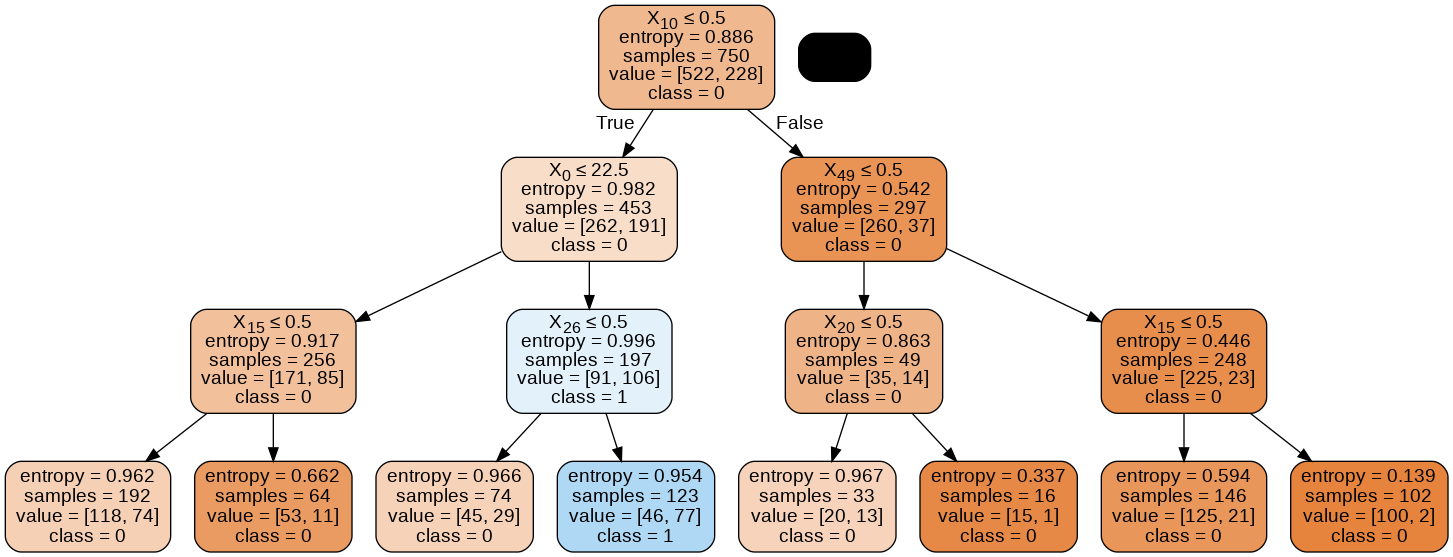

In [ ]:
#Affichage de l'arbre
feature_cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

##SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_svm))
print("Precision:",precision_score(Y_test, y_pred_svm))
print("Recall:",recall_score(Y_test, y_pred_svm))
print('NMI: ',nmi(Y_test,y_pred_svm))
print("F-score: ", f1(Y_test,y_pred_svm))

Accuracy: 0.772
Precision: 0.827027027027027
Recall: 0.8595505617977528
NMI:  0.14708895444198994
F-score:  0.8429752066115702


##LDA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,Y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.740
Config: {'solver': 'svd'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 603, in fit
    covariance_estimator=self.covariance_estimator,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/li

In [ ]:
y_pred_lda = search.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_lda))
print("Precision:",precision_score(Y_test, y_pred_lda))
print("Recall:",recall_score(Y_test, y_pred_lda))
print('NMI: ',nmi(Y_test,y_pred_lda))
print("F-score: ", f1(Y_test,y_pred_lda))

Accuracy: 0.788
Precision: 0.8306878306878307
Recall: 0.8820224719101124
NMI:  0.17203207667840692
F-score:  0.8555858310626703


##QDA

In [ ]:
clf = QDA()
clf.fit(X_train, Y_train)
y_pred_qda = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred_qda))
print("Precision:",precision_score(Y_test, y_pred_qda))
print("Recall:",recall_score(Y_test, y_pred_qda))
print('NMI: ',nmi(Y_test,y_pred_qda))
print("F-score: ", f1(Y_test,y_pred_qda))

Accuracy: 0.76
Precision: 0.7731481481481481
Recall: 0.9382022471910112
NMI:  0.10444052221959237
F-score:  0.847715736040609


**Après avoir testé plusieurs modèles de classification sur nos données, nous concluons les points suivants:**


*   Tous les modèles ont obtenu des scores satisfaisants, avec une accuracy qui dépasse 72% 
*   Le score NMI est beaucoup trop faible pour tous les modèles (<19%) et ne permet pas une bonne comparaison>

**Il n'est pas possible de déclarer clairement quel modèle est le meilleur car les scores varient suivant chaque métrique. Globalement, on peut dire que LDA s'en sort le mieux sur tous les plans avec 78.8% d'accuracy et 85% pour F-score, suivi de Random Forest (qui atteint les meilleurs résultats sur presque toutes les métriques,notamment 91% sur le recall et precision) puis SVM.**

**On note aussi que l'on obtient 99% sur le recall pour KNN, mais ce modèle possède la plus faible accuracy et precision et un nmi nul.**

**Toutefois, on le répète, les différences sont globalement assez légères et tous ces modèles représentent de bons candidats pour le scoring des crédits bancaires.**

##Dealing with umbalanced data

**Dans cette partie, on tente d'abord d'équilibrer nos données en employant la technique d'oversampling de SMOTE, puis on applique à nouveau tous les modèles vus précedemment**

In [ ]:
# Apply the SMOTE over−sampling
sm = SMOTE(sampling_strategy='auto')
X_resampled , y_resampled = sm.fit_resample(X_train, Y_train)
X_resampled_t , y_resampled_t = sm.fit_resample(X_test, Y_test)


###QDA

In [ ]:
clf = QDA()
clf.fit(X_resampled, y_resampled)
y_pred_qda = clf.predict(X_resampled_t)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_qda))
print("Precision:",precision_score(y_resampled_t, y_pred_qda))
print("Recall:",recall_score(y_resampled_t, y_pred_qda))
print('NMI: ',nmi(y_resampled_t,y_pred_qda))
print("F-score: ", f1(y_resampled_t,y_pred_qda))

Accuracy: 0.797752808988764
Precision: 0.712
Recall: 1.0
NMI:  0.4171003829042086
F-score:  0.8317757009345794


###Random Forest

In [ ]:
random_forest = RandomForestClassifier( random_state = 100)
rf=random_forest.fit(X_resampled, y_resampled)

In [ ]:
Y_test_pred=rf.predict(X_resampled_t)

In [ ]:
confusion_matrix = confusion_matrix(y_resampled_t, Y_test_pred)
confusion_matrix

array([[155,  23],
       [ 39, 139]])

In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, Y_test_pred))
print("Precision:",precision_score(y_resampled_t, Y_test_pred))
print("Recall:",recall_score(y_resampled_t, Y_test_pred))
print('NMI: ',nmi(y_resampled_t,Y_test_pred))
print("F-score: ", f1(y_resampled_t,Y_test_pred))

Accuracy: 0.8258426966292135
Precision: 0.7989690721649485
Recall: 0.8707865168539326
NMI:  0.3382508479602934
F-score:  0.8333333333333334


###LDA

In [ ]:

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_resampled, y_resampled)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.810
Config: {'solver': 'svd'}


In [ ]:
y_pred_lda = search.predict(X_resampled_t)

In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_lda))
print("Precision:",precision_score(y_resampled_t, y_pred_lda))
print("Recall:",recall_score(y_resampled_t, y_pred_lda))
print('NMI: ',nmi(y_resampled_t,y_pred_lda))
print("F-score: ", f1(y_resampled_t,y_pred_lda))

Accuracy: 0.8455056179775281
Precision: 0.8186528497409327
Recall: 0.8876404494382022
NMI:  0.38479440323934316
F-score:  0.8517520215633423


###Decision tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_resampled, y_resampled)

#Predict the response for test dataset
y_pred_D = clf.predict(X_resampled_t)


In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_D))
print("Precision:",precision_score(y_resampled_t, y_pred_D))
print("Recall:",recall_score(y_resampled_t, y_pred_D))
print('NMI: ',nmi(y_resampled_t,y_pred_D))
print("F-score: ", f1(y_resampled_t,y_pred_D))

Accuracy: 0.7471910112359551
Precision: 0.75
Recall: 0.7415730337078652
NMI:  0.1843378720394333
F-score:  0.7457627118644068


###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_resampled, y_resampled)

y_pred_log=logreg.predict(X_resampled_t)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_log))
print("Precision:",precision_score(y_resampled_t, y_pred_log))
print("Recall:",recall_score(y_resampled_t, y_pred_log))
print('NMI: ',nmi(y_resampled_t,y_pred_log))
print("F-score: ", f1(y_resampled_t,y_pred_log))

Accuracy: 0.7921348314606742
Precision: 0.8058823529411765
Recall: 0.7696629213483146
NMI:  0.2635680781582072
F-score:  0.7873563218390804


###KNN

In [ ]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 33))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_resampled, y_resampled)
    y_pred_k = knn.predict(X_resampled_t)
    scores.append(accuracy_score(y_resampled_t, y_pred_k))

Text(0, 0.5, 'Testing Accuracy')

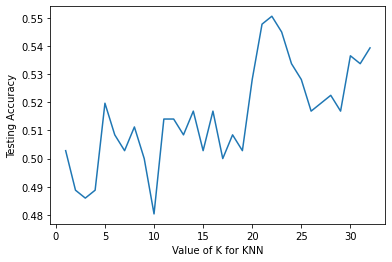

In [ ]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#Select the model with best result
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_resampled, y_resampled)
y_pred_kn = knn.predict(X_resampled_t)

In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_kn))
print("Precision:",precision_score(y_resampled_t, y_pred_kn))
print("Recall:",recall_score(y_resampled_t, y_pred_kn))
print('NMI: ',nmi(y_resampled_t,y_pred_kn))
print("F-score: ", f1(y_resampled_t,y_pred_kn))

Accuracy: 0.550561797752809
Precision: 0.5420560747663551
Recall: 0.651685393258427
NMI:  0.007823389420508593
F-score:  0.5918367346938775


###Naive Bayes

In [ ]:
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_resampled, y_resampled)

y_pred_nb = model.predict(X_resampled_t)

In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_nb))
print("Precision:",precision_score(y_resampled_t, y_pred_nb))
print("Recall:",recall_score(y_resampled_t, y_pred_nb))
print('NMI: ',nmi(y_resampled_t,y_pred_nb))
print("F-score: ", f1(y_resampled_t,y_pred_nb))

Accuracy: 0.8230337078651685
Precision: 0.8323699421965318
Recall: 0.8089887640449438
NMI:  0.32710642099784454
F-score:  0.8205128205128205


###SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_resampled, y_resampled)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_resampled_t)

In [ ]:
print("Accuracy:",accuracy_score(y_resampled_t, y_pred_svm))
print("Precision:",precision_score(y_resampled_t, y_pred_svm))
print("Recall:",recall_score(y_resampled_t, y_pred_svm))
print('NMI: ',nmi(y_resampled_t,y_pred_svm))
print("F-score: ", f1(y_resampled_t,y_pred_svm))

Accuracy: 0.8117977528089888
Precision: 0.8135593220338984
Recall: 0.8089887640449438
NMI:  0.30232241426549383
F-score:  0.8112676056338028


**On remarque que l'équilibrage des données a permis d'améliorer largement les résultats de certaines métriques, principalement l'accuracy et NMI, mais que les autres métriques sont affectées négativement, comme pour precision et le recall.**


**On constate aussi que l'équilibrage fonctionne mieux sur certains modèles plutôt que d'autres. Cela a aidé à améliorer significativement le modèle QDA qui atteint 79% d'accuracy, 42% NMI et 100% sur le recall. Par contre, Il a fonctionné le moins pour KNN pour qui les scores ont chuté complètement. Cela pourrait indiquer que certains modèles arrivent mieux que d'autres à traiter des données non équilibrées. Ceci est le cas par exemple de LDA et Random Forests pour lesquels on a pu améliorer l'accuracy et NMI sans pour autant faire trop baisser les autres métriques.**


**On atteint donc la même conclusion que précédemment, qui est que LDA reste le modèle le plus adapté globalement au scoring de notre jeu de données avec 84% d'accuracy, suivi de random Forests. Il reste toutefois que même les autres modèles sont très bons candidats pour cet exercice de scoring.**


**Pour conclure, Il n'est pas facile de travailler sur la classification avec des variables mixtes, On a pu cependant obtenir de très bons résultats en optant pour l'approche d'employer le one-hot encoding sur les variables catégorielles. Il est aussi important de vérifier si les données sont équilibrées et procéder à un équilibrage (over/under sampling) suivant le modèle choisi. On remarque qu'il existe une multitude de modèles adaptés à la classification sur des variables mixtes, notamment LDA et random forests qui sont parmi les meilleurs, et et qu'on peut améliorer nos modèles en sélectionnant les bons paramétrages et en testant plusieurs combinaisons comme on a pu le voir avec lda, decision trees et knn(choix du k).**



# Données relationnelles

## Cora dataset

### Prétraitement

In [ ]:
from scipy.io import loadmat

mat = loadmat('drive/MyDrive/Colab Notebooks/Projet_App_Sup/cora.mat')
print(mat['fea'].shape)

(2708, 1433)


In [ ]:
import numpy as np

X = np.array(mat['fea'])
W = np.array(mat['W'])
y = (np.array(mat['gnd'])).flatten()
y.shape

(2708,)

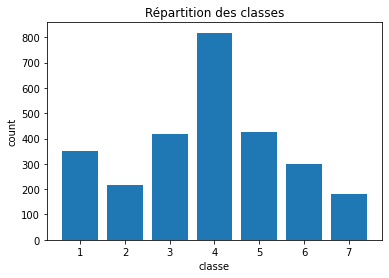

In [ ]:
import matplotlib.pyplot as plt

(unique, counts) = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("classe")
plt.ylabel("count")
plt.title("Répartition des classes")
plt.show()


Les classes sont un peu déséquilibrées.

### Classification avec X

In [ ]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 4.3 MB/s 
     |████████████████████████████████| 890 kB 50.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, cora_classes, train_size=0.75, stratify=cora_classes, random_state=42)


Pour tester les différents modèles, on utilise une validation croisée avec 10 blocs.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 42
nb_folds = 10
kfold = StratifiedKFold(n_splits=nb_folds, random_state=seed, shuffle=True)
scores = ["accuracy", "normalized_mutual_info_score", "f1_weighted"]
models = []

# Algorithmes à comparer
models.append(("Naive Bayes", GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric="jaccard")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(('Linear SVM', SVC(kernel='linear', max_iter=300000, random_state=seed)))
models.append(('Non-Linear SVM', SVC(max_iter=9999, random_state=seed)))
models.append(("Logistic Regression", LogisticRegression(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(("Random Forest", RandomForestClassifier(random_state=seed)))

def evaluate_model(data, model_name, model):
  result = cross_validate(model, data, y, cv=kfold, scoring=scores)
  print(model_name)
  mean_acc = result['test_accuracy'].mean()
  mean_nmi = result['test_normalized_mutual_info_score'].mean()
  mean_f1 = result['test_f1_weighted'].mean()
  print(f"Accuracy moyenne : {mean_acc:.2f}", end=' - ')
  print(f"NMI moyenne : {mean_nmi.mean():.2f}", end=' - ')
  print(f"F1 score moyen : {mean_f1.mean():.2f}", end='\n\n')
  return [mean_acc, mean_nmi, mean_f1]

def evaluate_models(data, models):
  results = []
  print(f"Classification croisée avec {nb_folds} blocs :")
  for model_name, model in models:
    results.append((model_name, evaluate_model(data, model_name, model)))
  return results

def compare_classification_results(results, title):

  x = np.arange(len(results))  # the label locations
  width = 0.20  # the width of the bars
  model_names, accs, nmis, f1s = [], [], [], []
  for model_name, result in results:
     model_names.append(model_name)
     accs.append(round(result[0], 2))
     nmis.append(round(result[1], 2))
     f1s.append(round(result[2], 2))

  fig, ax = plt.subplots(figsize=(15,6))
  rects1 = ax.bar(x - width, accs, width, label='Accuracy')
  rects2 = ax.bar(x, nmis, width, label='NMI')
  rects3 = ax.bar(x + width, f1s, width, label='F1 score')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_title(title)
  ax.set_xticks(x, model_names)
  ax.legend()

  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
  ax.bar_label(rects3, padding=3)

  fig.tight_layout()

  plt.show()


In [ ]:
cora_results = evaluate_models(X, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.49 - NMI moyenne : 0.22 - F1 score moyen : 0.49



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.73 - NMI moyenne : 0.49 - F1 score moyen : 0.72

LDA
Accuracy moyenne : 0.64 - NMI moyenne : 0.37 - F1 score moyen : 0.64



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.14 - NMI moyenne : 0.04 - F1 score moyen : 0.08

Linear SVM
Accuracy moyenne : 0.73 - NMI moyenne : 0.50 - F1 score moyen : 0.73

Non-Linear SVM
Accuracy moyenne : 0.76 - NMI moyenne : 0.56 - F1 score moyen : 0.76

Logistic Regression
Accuracy moyenne : 0.77 - NMI moyenne : 0.56 - F1 score moyen : 0.77

CART
Accuracy moyenne : 0.65 - NMI moyenne : 0.39 - F1 score moyen : 0.65

Random Forest
Accuracy moyenne : 0.76 - NMI moyenne : 0.55 - F1 score moyen : 0.76



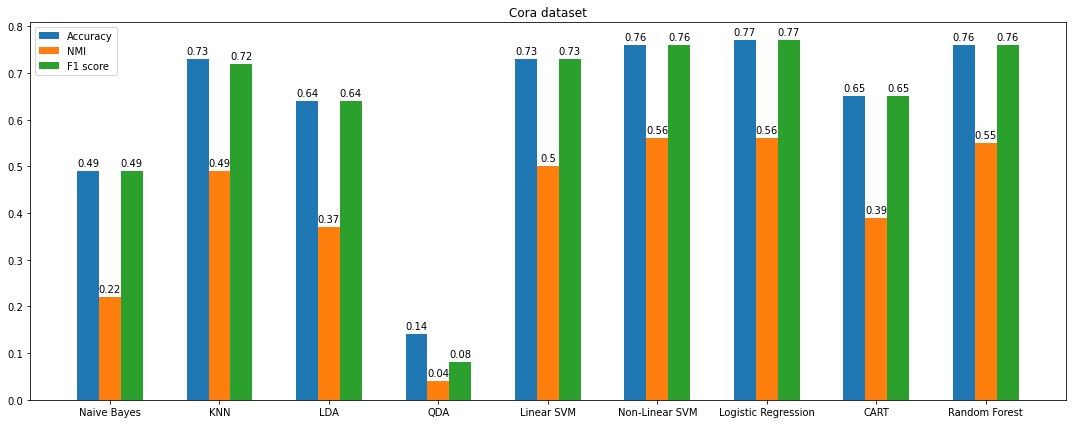

In [ ]:
compare_classification_results(cora_results, "Cora dataset")

### Classification avec la combinaison de W et X

In [ ]:
W.shape

(2708, 2708)

In [ ]:
n = W.shape[0]
D =  np.zeros(shape = W.shape)
for i in range(n):
  D[i,i] = np.sum(W[i])

On calcule la matrice M = D^(-1)* W * X où D est une matrice
diagonale, chaque valeur diagonale correspondand à la somme des valeurs d’une ligne de W.

In [ ]:
M = np.linalg.inv(D)@W@X
M.shape

(2708, 1433)

In [ ]:
cora_results_M = evaluate_models(M, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.73 - NMI moyenne : 0.51 - F1 score moyen : 0.73



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.82 - NMI moyenne : 0.64 - F1 score moyen : 0.82

LDA
Accuracy moyenne : 0.75 - NMI moyenne : 0.53 - F1 score moyen : 0.75



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.40 - NMI moyenne : 0.31 - F1 score moyen : 0.45

Linear SVM
Accuracy moyenne : 0.82 - NMI moyenne : 0.64 - F1 score moyen : 0.82

Non-Linear SVM
Accuracy moyenne : 0.82 - NMI moyenne : 0.65 - F1 score moyen : 0.82

Logistic Regression
Accuracy moyenne : 0.84 - NMI moyenne : 0.66 - F1 score moyen : 0.84

CART
Accuracy moyenne : 0.72 - NMI moyenne : 0.50 - F1 score moyen : 0.72

Random Forest
Accuracy moyenne : 0.83 - NMI moyenne : 0.66 - F1 score moyen : 0.83



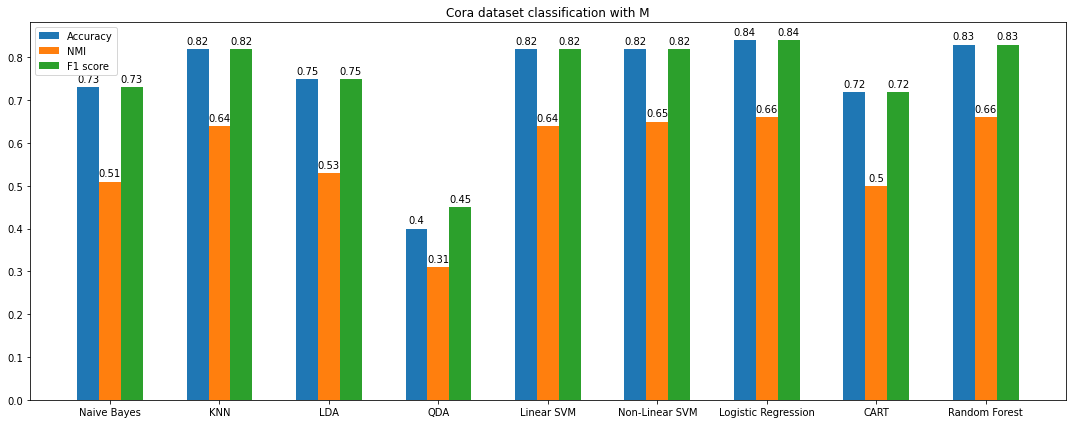

In [ ]:
compare_classification_results(cora_results_M, "Cora dataset classification with M")

On obtient des résultats de classification nettement meilleurs en utilisant la combinaison de W et X, plutôt que seulement la matrice X.

### Autre combinaison de W et X

La matrice M, résultant de D^(-1) * W * X, correspond en fait à une moyenne 
de tous les vecteurs de mots des documents associés à un document (dans W). En effet, chaque cellule M[i,j] est égale à :

(t1 + ... + tv) / v

où v est le nombre de documents associés (voisins) au document i et t1 à tv les valeurs de X des voisins pour la colonne j.

Dans ce cas de figure, le document i n'intervient donc pas dans sa propre représentation. Or, on peut estimer qu'un document n'est pas défini que par ses voisins mais aussi par lui-même.

Nous pouvons donc utiliser une nouvelle représentation M_reg :

M_reg = (X + M) / 2

Ainsi, ici, le document originel (X) compte pour 50% et la moyenne de ses voisins (M) pour les 50% restants.

In [ ]:
M_reg = (M + X) / 2

In [ ]:
cora_results_M_reg = evaluate_models(M_reg, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.80 - NMI moyenne : 0.61 - F1 score moyen : 0.80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.85 - NMI moyenne : 0.69 - F1 score moyen : 0.85

LDA
Accuracy moyenne : 0.84 - NMI moyenne : 0.67 - F1 score moyen : 0.84



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.22 - NMI moyenne : 0.14 - F1 score moyen : 0.22

Linear SVM
Accuracy moyenne : 0.88 - NMI moyenne : 0.74 - F1 score moyen : 0.88

Non-Linear SVM
Accuracy moyenne : 0.90 - NMI moyenne : 0.77 - F1 score moyen : 0.90

Logistic Regression
Accuracy moyenne : 0.88 - NMI moyenne : 0.75 - F1 score moyen : 0.88

CART
Accuracy moyenne : 0.78 - NMI moyenne : 0.57 - F1 score moyen : 0.78

Random Forest
Accuracy moyenne : 0.88 - NMI moyenne : 0.74 - F1 score moyen : 0.88



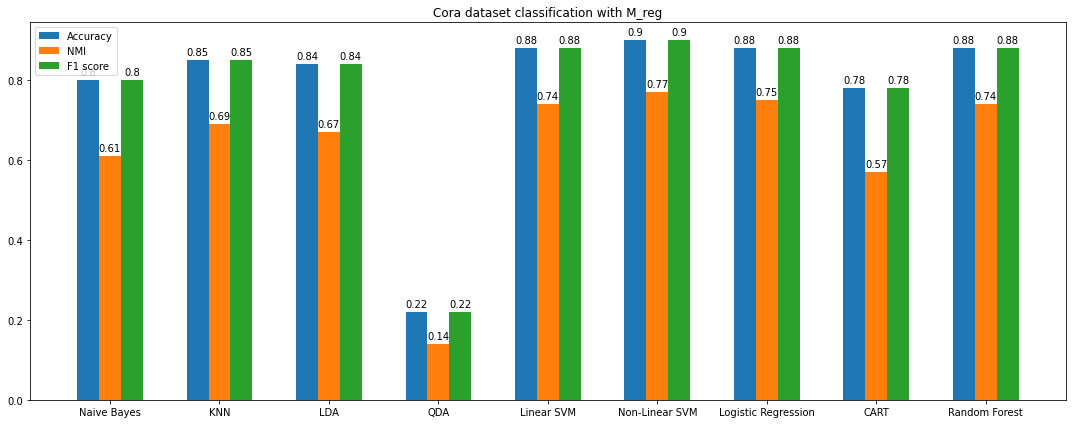

In [ ]:
compare_classification_results(cora_results_M_reg, "Cora dataset classification with M_reg")

Les résultats de classification sont meilleurs avec M_reg que M, ce qui confirme notre l'intuition sur le fait d'utiliser un document i et ses voisins plutôt que seulement ses voisins.

## CiteSeer dataset

### Prétraitement

In [ ]:
from scipy.io import loadmat

mat = loadmat('drive/MyDrive/Colab Notebooks/Projet_App_Sup/citeseer.mat')
print(mat['fea'].shape)

(3327, 3703)


In [ ]:
import numpy as np

X = np.array(mat['fea'])
W = np.array(mat['W'])
y = (np.array(mat['gnd'])).flatten()
y.shape

(3327,)

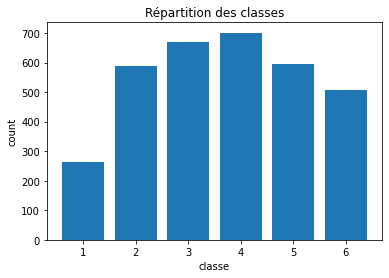

In [ ]:
import matplotlib.pyplot as plt

(unique, counts) = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("classe")
plt.ylabel("count")
plt.title("Répartition des classes")
plt.show()


Les classes sont relativement equilibrées, hormis la classe 1.

### Classification avec X

In [ ]:
models = []

# Algorithmes à comparer
models.append(("Naive Bayes", GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric="jaccard")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(('Linear SVM', SVC(kernel='linear', max_iter=30000, random_state=seed)))
models.append(('Non-Linear SVM', SVC(max_iter=3000, random_state=seed)))
models.append(("Logistic Regression", LogisticRegression(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(("Random Forest", RandomForestClassifier(random_state=seed)))

In [ ]:
citeseer_results = evaluate_models(X, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.62 - NMI moyenne : 0.33 - F1 score moyen : 0.62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.70 - NMI moyenne : 0.43 - F1 score moyen : 0.70

LDA
Accuracy moyenne : 0.36 - NMI moyenne : 0.09 - F1 score moyen : 0.35



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.19 - NMI moyenne : 0.03 - F1 score moyen : 0.13

Linear SVM
Accuracy moyenne : 0.69 - NMI moyenne : 0.42 - F1 score moyen : 0.69

Non-Linear SVM
Accuracy moyenne : 0.73 - NMI moyenne : 0.48 - F1 score moyen : 0.72

Logistic Regression
Accuracy moyenne : 0.72 - NMI moyenne : 0.46 - F1 score moyen : 0.72

CART
Accuracy moyenne : 0.61 - NMI moyenne : 0.32 - F1 score moyen : 0.61

Random Forest
Accuracy moyenne : 0.73 - NMI moyenne : 0.48 - F1 score moyen : 0.72



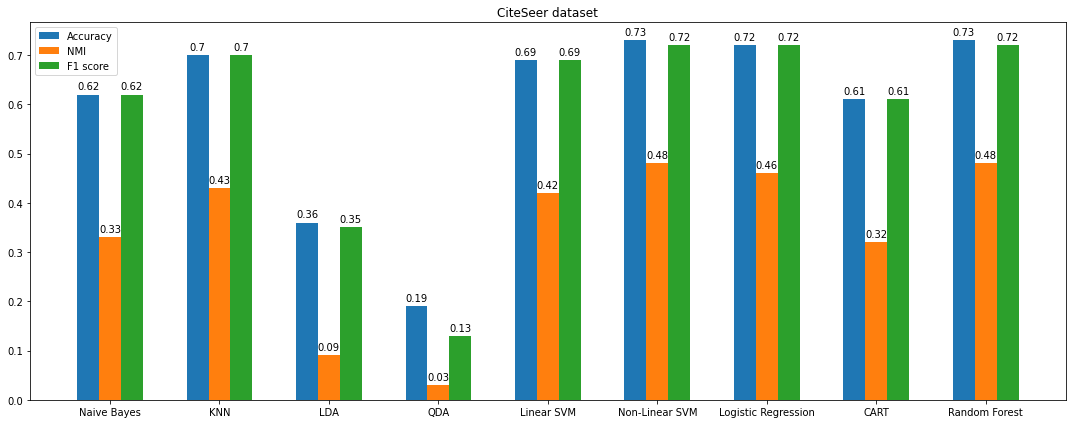

In [ ]:
compare_classification_results(citeseer_results, "CiteSeer dataset")

### Classification avec la combinaison de W et X

In [ ]:
W.shape

(3327, 3327)

In [ ]:
n = W.shape[0]
D =  np.zeros(shape = W.shape)
for i in range(n):
  D[i,i] = np.sum(W[i])

On calcule la matrice M = D^(-1)* W * X où D est une matrice
diagonale, chaque valeur diagonale correspondand à la somme des valeurs d’une ligne de W.

In [ ]:
M = np.linalg.inv(D)@W@X
M.shape

(3327, 3703)

In [ ]:
citeseer_results_M = evaluate_models(M, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.67 - NMI moyenne : 0.39 - F1 score moyen : 0.67



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.71 - NMI moyenne : 0.43 - F1 score moyen : 0.70

LDA
Accuracy moyenne : 0.47 - NMI moyenne : 0.17 - F1 score moyen : 0.47



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.47 - NMI moyenne : 0.25 - F1 score moyen : 0.50

Linear SVM
Accuracy moyenne : 0.68 - NMI moyenne : 0.40 - F1 score moyen : 0.68

Non-Linear SVM
Accuracy moyenne : 0.73 - NMI moyenne : 0.47 - F1 score moyen : 0.72



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression
Accuracy moyenne : 0.70 - NMI moyenne : 0.43 - F1 score moyen : 0.70

CART
Accuracy moyenne : 0.62 - NMI moyenne : 0.32 - F1 score moyen : 0.61

Random Forest
Accuracy moyenne : 0.72 - NMI moyenne : 0.46 - F1 score moyen : 0.71



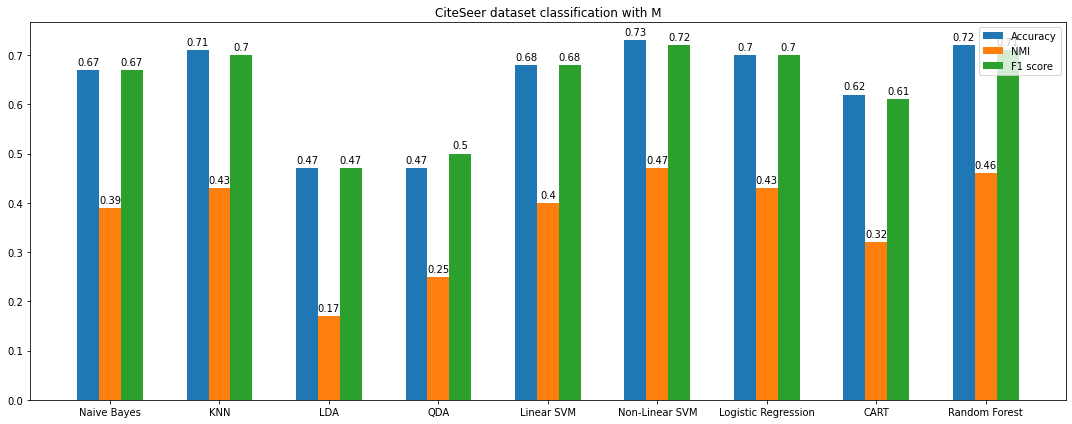

In [ ]:
compare_classification_results(citeseer, "CiteSeer dataset classification with M")

### Autre combinaison de W et X

In [ ]:
M_reg = (M + X) / 2

In [ ]:
citeseer_results_M_reg = evaluate_models(M_reg, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.73 - NMI moyenne : 0.48 - F1 score moyen : 0.73



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

KNN
Accuracy moyenne : 0.74 - NMI moyenne : 0.49 - F1 score moyen : 0.74

LDA
Accuracy moyenne : 0.36 - NMI moyenne : 0.11 - F1 score moyen : 0.37



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

QDA
Accuracy moyenne : 0.48 - NMI moyenne : 0.29 - F1 score moyen : 0.52

Linear SVM
Accuracy moyenne : 0.73 - NMI moyenne : 0.48 - F1 score moyen : 0.73

Non-Linear SVM
Accuracy moyenne : 0.78 - NMI moyenne : 0.55 - F1 score moyen : 0.77



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression
Accuracy moyenne : 0.76 - NMI moyenne : 0.53 - F1 score moyen : 0.76

CART
Accuracy moyenne : 0.67 - NMI moyenne : 0.39 - F1 score moyen : 0.67

Random Forest
Accuracy moyenne : 0.77 - NMI moyenne : 0.53 - F1 score moyen : 0.76



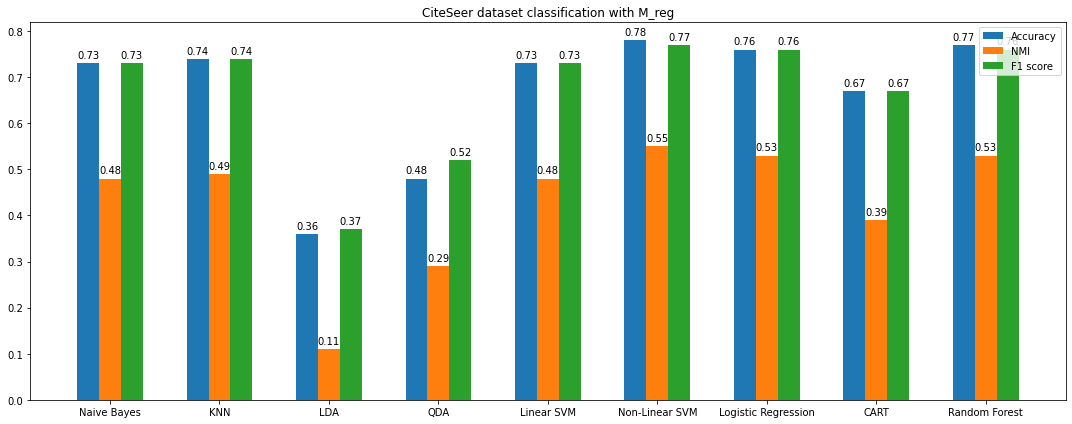

In [ ]:
compare_classification_results(citeseer_results_M_reg, "CiteSeer dataset classification with M_reg")

Là aussi, les résultats de classification sont globalement un peu meilleurs avec M_reg que M.

##Pubmed dataset

### Prétraitement

In [ ]:
from scipy.io import loadmat

mat = loadmat('drive/MyDrive/Colab Notebooks/Projet_App_Sup/pubmed.mat')
print(mat['fea'].shape)

(19717, 500)


In [ ]:
import numpy as np

X = np.array(mat['fea'])
y = (np.array(mat['gnd'])).flatten()
y.shape

(19717,)

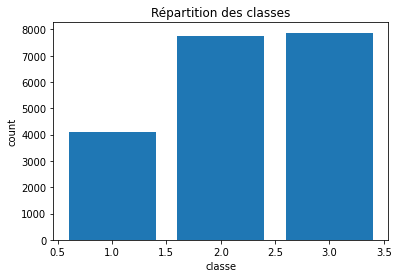

In [ ]:
import matplotlib.pyplot as plt

(unique, counts) = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("classe")
plt.ylabel("count")
plt.title("Répartition des classes")
plt.show()


On réduit la validation croisée à 5 blocs pour réduire le temps de calcul car le dataset est grand.

In [ ]:
nb_folds = 5
kfold = StratifiedKFold(n_splits=nb_folds, random_state=seed, shuffle=True)

### Classification avec X

Etant donné la grande taille des données (19717 individus et 500 features), nous décidons d'appliquer d'abord une réduction de dimension sur notre dataset pour accéler le temps de calcul des algorithmes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X, with_mean=False) #Réduction des données, mais sans les centrer pour conserver la sparsité

pca = PCA(n_components=50, random_state=seed)
pca.fit(X_scaled)


PCA(n_components=50, random_state=42)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.24179188004225882

En ne gardant que 50 composantes principales, on obtient un pourcentage de variance expliquée de 24%.

In [ ]:
X_reduced = pca.transform(X_scaled)

In [ ]:
models = []

# Algorithmes à comparer
models.append(("Naive Bayes", GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(('Linear SVM', SVC(kernel='linear', max_iter=30000, random_state=seed)))
models.append(('Non-Linear SVM', SVC(max_iter=5000, random_state=seed)))
models.append(("Logistic Regression", LogisticRegression(max_iter=1000, random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(("Random Forest", RandomForestClassifier(random_state=seed)))

In [ ]:
pubmed_results = evaluate_models(X_reduced, models)

Classification croisée avec 5 blocs :
Naive Bayes
Accuracy moyenne : 0.74 - NMI moyenne : 0.33 - F1 score moyen : 0.74

KNN
Accuracy moyenne : 0.80 - NMI moyenne : 0.43 - F1 score moyen : 0.80

LDA
Accuracy moyenne : 0.83 - NMI moyenne : 0.48 - F1 score moyen : 0.83

QDA
Accuracy moyenne : 0.76 - NMI moyenne : 0.38 - F1 score moyen : 0.75



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

Linear SVM
Accuracy moyenne : 0.72 - NMI moyenne : 0.34 - F1 score moyen : 0.72



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5

Non-Linear SVM
Accuracy moyenne : 0.85 - NMI moyenne : 0.53 - F1 score moyen : 0.85

Logistic Regression
Accuracy moyenne : 0.83 - NMI moyenne : 0.48 - F1 score moyen : 0.83

CART
Accuracy moyenne : 0.70 - NMI moyenne : 0.26 - F1 score moyen : 0.70

Random Forest
Accuracy moyenne : 0.82 - NMI moyenne : 0.46 - F1 score moyen : 0.82



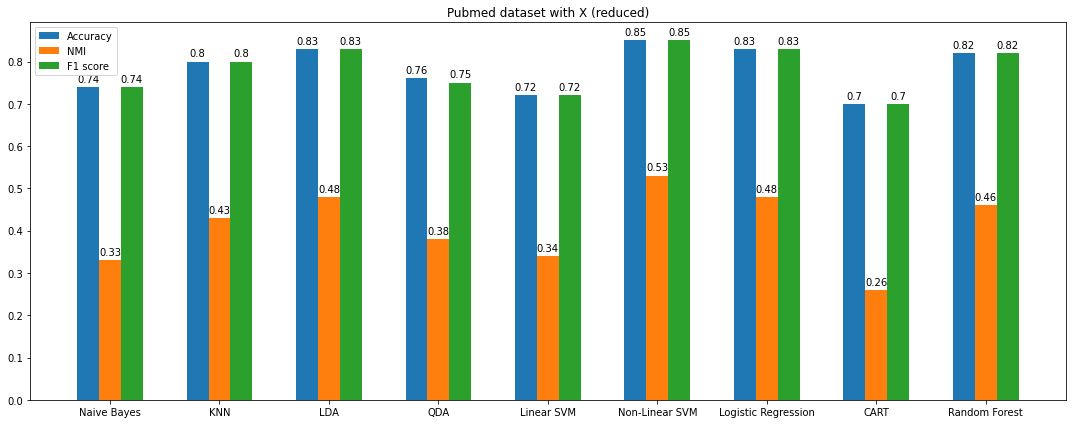

In [ ]:
compare_classification_results(pubmed_results, "Pubmed dataset with X (reduced)")

On obtient déjà de bons pas résultats de classification avec la plupart des algorithmes. Cela montre que la pondération TF/IDF offre une meilleure représentation que le vecteur de mot 0/1 des autres datasets.

### Classification avec la combinaison de W et X

In [ ]:
W = mat['W']

In [ ]:
W = W.toarray()

In [ ]:
from scipy.sparse import csc_matrix

n = X.shape[0]
D = np.zeros((n, n))
W_sum = W.sum(axis=1)
W_sum = np.squeeze(np.asarray(W_sum))
for i in range(n):
  D[i,i] = W_sum[i]

On calcule la matrice M = D^(-1)* W * X où D est une matrice
diagonale, chaque valeur diagonale correspondand à la somme des valeurs d’une ligne de W.

In [ ]:
from scipy.sparse.linalg import inv

D_sparse = csc_matrix(D)
X_sparse = csc_matrix(X)
W_sparse = csc_matrix(W)
M = inv(D_sparse).dot(W_sparse).dot(X_sparse)
M.shape

(19717, 500)

In [ ]:
M = np.asarray(M.todense())

Etant donné la grande taille des données (19717 individus et 500 features), nous décidons d'appliquer d'abord une réduction de dimension sur notre dataset pour accéler le temps de calcul des algorithmes.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

M_scaled = scale(M, with_mean=False) #Réduction des données, mais sans les centrer pour conserver la sparsité

pca = PCA(n_components=50, random_state=seed)
pca.fit(M_scaled)


PCA(n_components=50, random_state=42)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.31411514297593873

En ne gardant que 50 composantes principales, on obtient un pourcentage de variance expliquée de 31%.

In [ ]:
M_reduced = pca.transform(M_scaled)

In [ ]:
pubmed_results_M = evaluate_models(M_reduced, models)

Classification croisée avec 5 blocs :
Naive Bayes
Accuracy moyenne : 0.73 - NMI moyenne : 0.30 - F1 score moyen : 0.73

KNN
Accuracy moyenne : 0.81 - NMI moyenne : 0.43 - F1 score moyen : 0.81

LDA
Accuracy moyenne : 0.78 - NMI moyenne : 0.38 - F1 score moyen : 0.78

QDA
Accuracy moyenne : 0.75 - NMI moyenne : 0.35 - F1 score moyen : 0.75



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

Linear SVM
Accuracy moyenne : 0.64 - NMI moyenne : 0.21 - F1 score moyen : 0.64



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5

Non-Linear SVM
Accuracy moyenne : 0.82 - NMI moyenne : 0.46 - F1 score moyen : 0.82

Logistic Regression
Accuracy moyenne : 0.79 - NMI moyenne : 0.39 - F1 score moyen : 0.79

CART
Accuracy moyenne : 0.75 - NMI moyenne : 0.33 - F1 score moyen : 0.75

Random Forest
Accuracy moyenne : 0.81 - NMI moyenne : 0.42 - F1 score moyen : 0.81



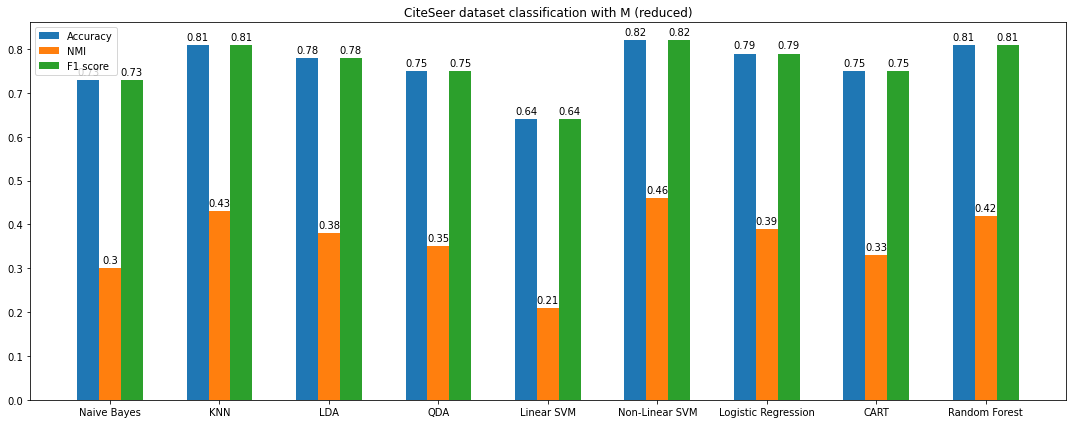

In [ ]:
compare_classification_results(pubmed_results_M, "CiteSeer dataset classification with M (reduced)")

Pour le dataset Pubmed, on obtient des résultats un peu deça en utilisant la combinaison de W et X plutôt que simplement X. Cela est probablement dû au fait que nous obtenions déjà de très bons résultats sur X grâce à TF/IDF et que combiner W et X brouille un peu cette représentation.

### Autre combinaison de W et X

In [ ]:
M_reg = (M + X) / 2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

M_reg_scaled = scale(M_reg, with_mean=False) #Réduction des données, mais sans les centrer pour conserver la sparsité

pca = PCA(n_components=50, random_state=seed)
pca.fit(M_reg_scaled)


PCA(n_components=50, random_state=42)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.3140140334267582

En ne gardant que 50 composantes principales, on obtient un pourcentage de variance expliquée de 31%.

In [ ]:
M_reg_reduced = pca.transform(M_reg_scaled)

In [ ]:
pubmed_results_M_reg = evaluate_models(M_reg_reduced, models)

Classification croisée avec 5 blocs :
Naive Bayes
Accuracy moyenne : 0.78 - NMI moyenne : 0.39 - F1 score moyen : 0.78



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


KNN
Accuracy moyenne : 0.40 - NMI moyenne : 0.00 - F1 score moyen : 0.23

LDA
Accuracy moyenne : 0.85 - NMI moyenne : 0.51 - F1 score moyen : 0.85

QDA
Accuracy moyenne : 0.79 - NMI moyenne : 0.42 - F1 score moyen : 0.79



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (ma

Linear SVM
Accuracy moyenne : 0.85 - NMI moyenne : 0.52 - F1 score moyen : 0.85

Non-Linear SVM
Accuracy moyenne : 0.87 - NMI moyenne : 0.57 - F1 score moyen : 0.87

Logistic Regression
Accuracy moyenne : 0.85 - NMI moyenne : 0.51 - F1 score moyen : 0.85

CART
Accuracy moyenne : 0.74 - NMI moyenne : 0.31 - F1 score moyen : 0.74

Random Forest
Accuracy moyenne : 0.85 - NMI moyenne : 0.51 - F1 score moyen : 0.85



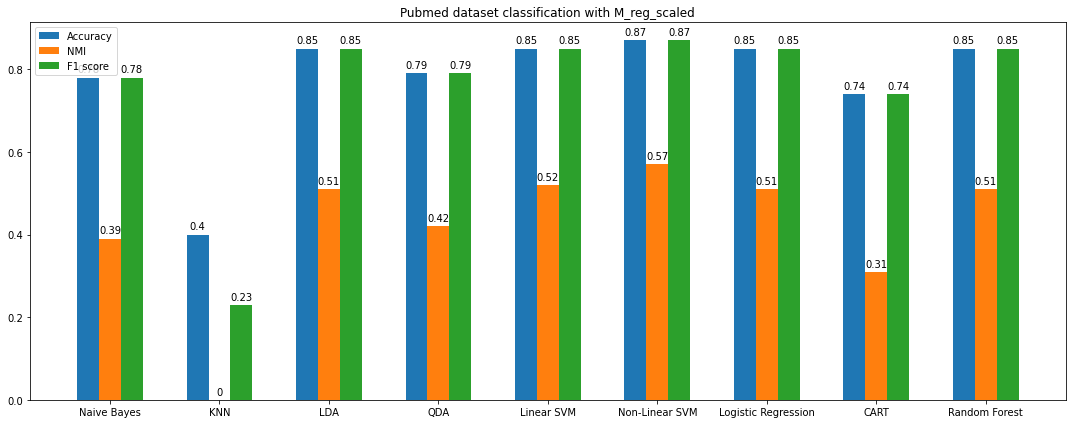

In [ ]:
compare_classification_results(pubmed_results_M_reg, "Pubmed dataset classification with M_reg_scaled")

Les résultats de classification sont globalement un peu meilleurs avec M_reg que ave M ou avec X.